In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from utils.clean_utils import reduce_dataframe, clean_dataframe

In [2]:
df_raw = pd.read_csv('data/feats_out.csv')

/Users/seramirchandani/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,24,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_reduce = reduce_dataframe(df_raw)

In [4]:
df = clean_dataframe(df_reduce)

/Users/seramirchandani/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
columns = df.columns

In [6]:
feat_cols = []
for name in columns:
    if name != "structureProteinName" and name != "cellID" and name != "save_feats_path":
        feat_cols.append(name)

In [7]:
df_features = df[feat_cols]
features_array = df_features.as_matrix()
features_array_std = StandardScaler().fit_transform(features_array)

In [8]:
y = df.structureProteinName.as_matrix()
y_factorize = pd.factorize(y) # Need integer representation of labels

In [9]:
pcd10 = PCA(10).fit(features_array_std)
data_reduced10 = np.dot(features_array_std, pcd10.components_.T)

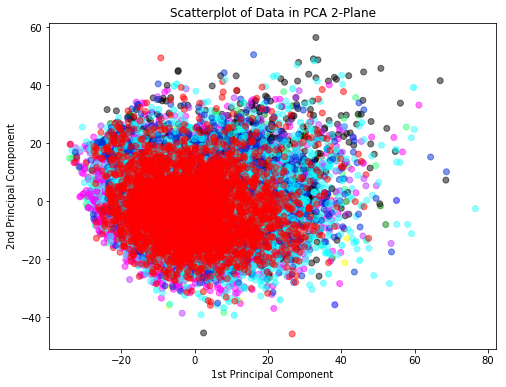

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(data_reduced10[:, 0], data_reduced10[:, 1], 
           color=np.array(["#B933FF","#33FDFF","#33FF7A","#0030D6","magenta","yellow","black","red","green","blue","cyan"])[y_factorize[0]],
          alpha = 0.5)
ax.set_title("Scatterplot of Data in PCA 2-Plane")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")

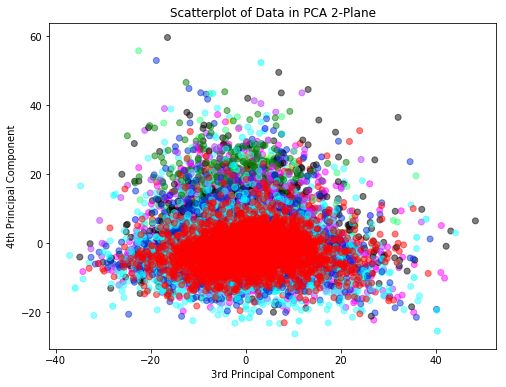

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(data_reduced10[:, 2], data_reduced10[:, 3], 
           color=np.array(["#B933FF","#33FDFF","#33FF7A","#0030D6","magenta","yellow","black","red","green","blue","cyan"])[y_factorize[0]],
          alpha = 0.5)
ax.set_title("Scatterplot of Data in PCA 2-Plane")
ax.set_xlabel("3rd Principal Component")
ax.set_ylabel("4th Principal Component")